In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Reading in data set
import pandas as pd

data=pd.read_csv("high_diamond_ranked_10min.csv")

In [ ]:
#Listing data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
#Understsnding the structure of the data frame

data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


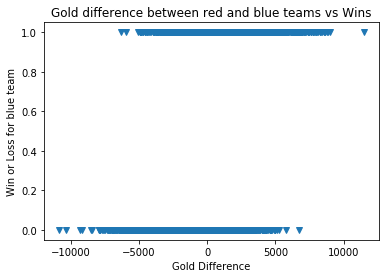

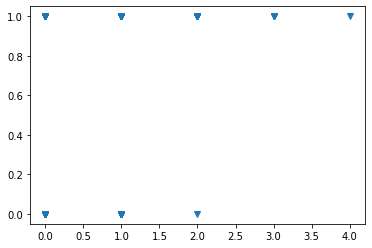

In [ ]:
#Based on what we know of the game, the most important factors deciding the course of a game(from the factors listed), should be 
#kills, gold, experience, objectives. Objectives are towers, Epic Monsters. Epic Monsters are dragons and heralds.
#Let's investigate these factors individually.

#First, let's create some graphs to try to get a visual idea of whether there is in fact any correlation.

import matplotlib.pyplot as plt

#Exploring the gold difference as a factor

plt.plot(data["blueGoldDiff"],data["blueWins"],'v')
plt.title("Gold difference between red and blue teams vs Wins")
plt.xlabel("Gold Difference")
plt.ylabel("Win or Loss for blue team")
plt.show()

plt.plot(data["blueTowersDestroyed"],data["blueWins"],'v')
plt.title("")
plt.show()

In [ ]:
#Looking for more correlations

corr_matrix=data.corr()
corr_matrix["blueWins"].sort_values(ascending=False)

blueWins                        1.000000
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueGoldPerMin                  0.417213
blueTotalGold                   0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
blueTotalMinionsKilled          0.224909
blueCSPerMin                    0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
gameId                          0.000985
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     -0.097172
redTowersDestroy

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1E894D688>,
      dtype=object)

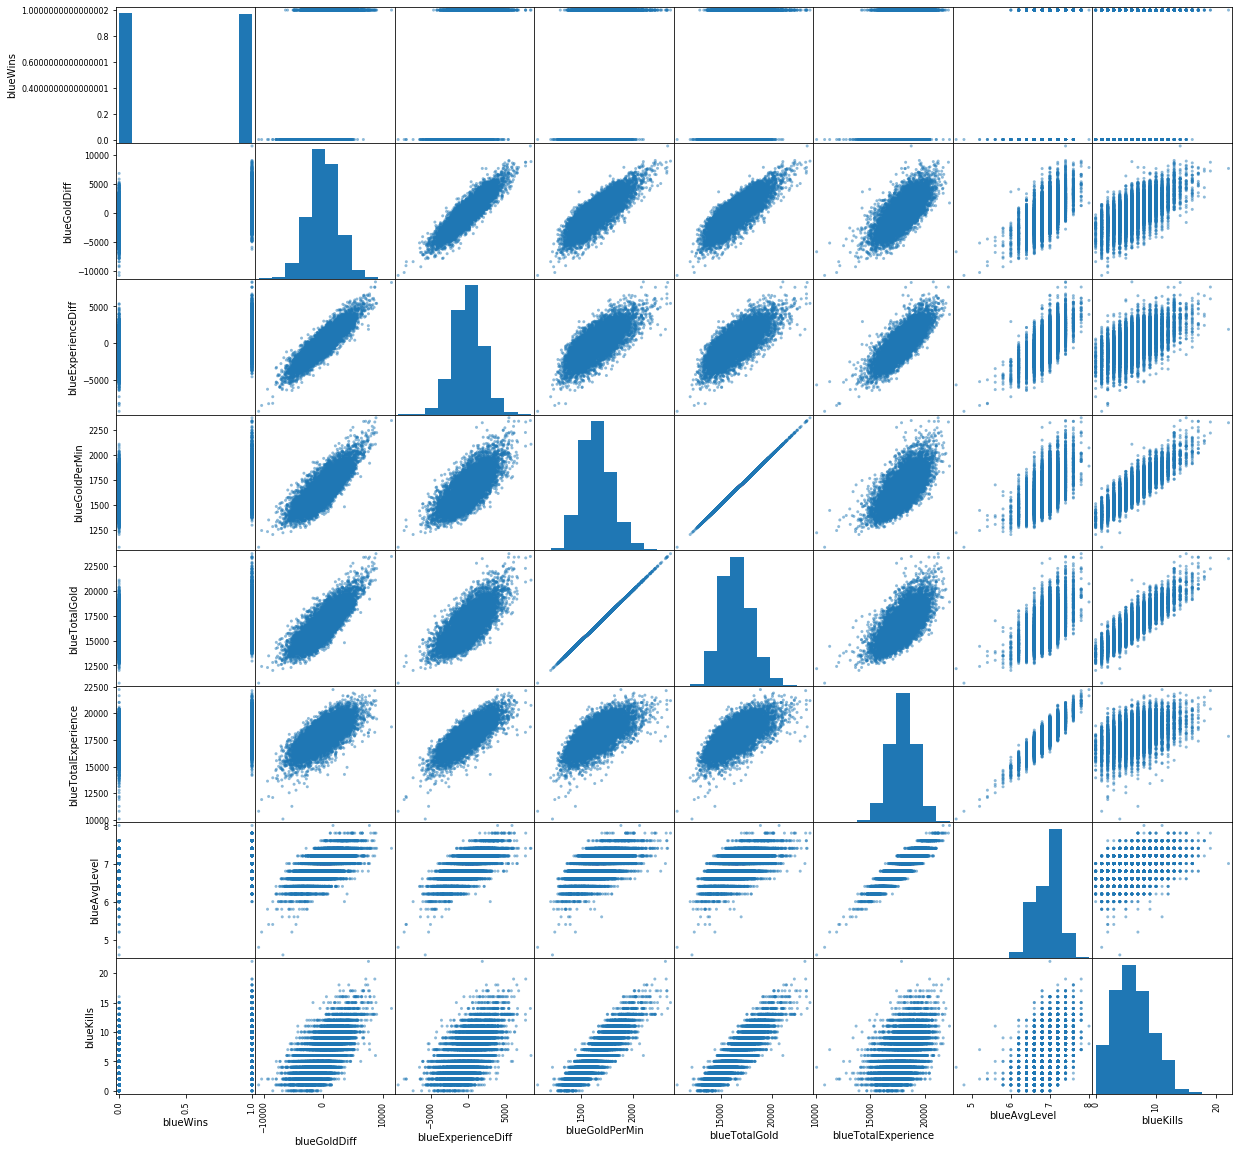

In [ ]:
#Another important thing to do is to look at how the various factors correlate with each other, for example, how does experience
#correlate with gold difference.

from pandas.plotting import scatter_matrix

attributes=["blueWins","blueGoldDiff","blueExperienceDiff","blueGoldPerMin","blueTotalGold","blueTotalExperience","blueAvgLevel","blueKills"]

scatter_matrix(data[attributes], figsize=(20, 20))

In [ ]:
#We need to split the data set into training and testing sets, before we do anything further.

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2)

In [ ]:
#Support Vector Machines are not scale invariant, so the data must be scaled before we can use the support vector machines.
#Here we scale the attributes we have identified as being important.

from sklearn import preprocessing
import numpy as np



